In [1]:
import numpy as np
import pickle
import pandas as pd

with open("attention_weights/lemma_attn", "rb") as f:
    lemma_attn = pickle.load(f)
    
with open("attention_weights/tag_attn", "rb") as f:
    tag_attn = pickle.load(f)

In [2]:
words = pd.read_table("attention_weights/hungarian-dev.out", names=["lemma", "inflected"])
d = pd.read_table("../data/conll2018/task1/all/hungarian-dev", names=["lemma", "inflected", "tags"])
d = d[["inflected", "tags"]].rename(columns={"inflected": "correct"})
words = pd.concat((words, d), axis=1)
words.head()

,lemma,inflected,correct,tags
0,észszerűsít,észszerűsítsd,észszerűsítsd,V;SBJV;PRS;DEF;2;SG
1,paradigmaváltás,paradigmaváltásban,paradigmaváltásban,N;IN+ESS;SG
2,szúnyog,szúnyogon,szúnyogon,N;ON+ESS;SG
3,felbujtó,felbujtókkal,felbujtókkal,N;INST;PL
4,tátog,tátogsz,tátogsz,V;IND;PRS;INDF;2;SG


Input lemma: barakk
Input tags: N;ACC;SG
Expected output: barakkot
Model output: barakkot
Correct: True


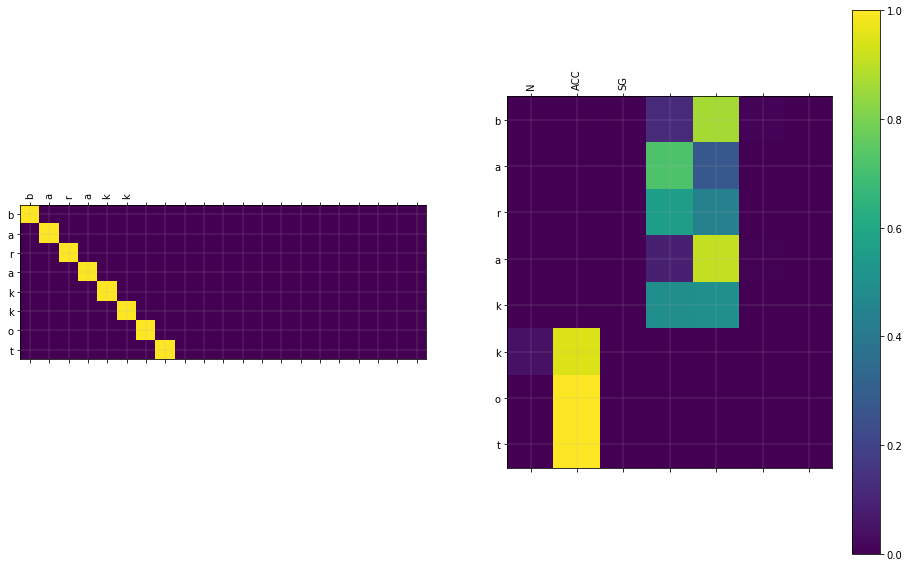

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


def plot_random_word():
    word = words.sample(1)
    batch_size = lemma_attn[0].shape[0]
    batch = word.index[0] // batch_size
    batch_idx = word.index[0] % batch_size
    la = lemma_attn[batch][batch_idx]
    ta = tag_attn[batch][batch_idx]
    lemma = word.iloc[0].lemma
    inflected = word.iloc[0].inflected
    tags = word.iloc[0].tags
    correct = word.iloc[0].correct
    print("Input lemma: {}".format(lemma))
    print("Input tags: {}".format(tags))
    print("Expected output: {}".format(correct))
    print("Model output: {}".format(inflected))
    print("Correct: {}".format(correct==inflected))
    la = la[:len(inflected)]
    ta = ta[:len(inflected)]
    
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 10))
    title = "{} -- {}".format(lemma, inflected)
    cax = ax[0].matshow(la)
    ax[0].set_xticklabels([''] + list(lemma), rotation=90)
    ax[0].set_yticklabels([''] + list(inflected))
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[0].grid(linewidth=.2)
    fig.colorbar(cax)
    
    cax = ax[1].matshow(ta)
    ax[1].set_xticklabels([''] + tags.split(';'), rotation=90)
    ax[1].set_yticklabels([''] + list(inflected))
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[1].grid(linewidth=.2)
    
plot_random_word()

Input lemma: nyúlvány
Input tags: N;FRML;SG
Expected output: nyúlványként
Model output: nyúlványként
Correct: True


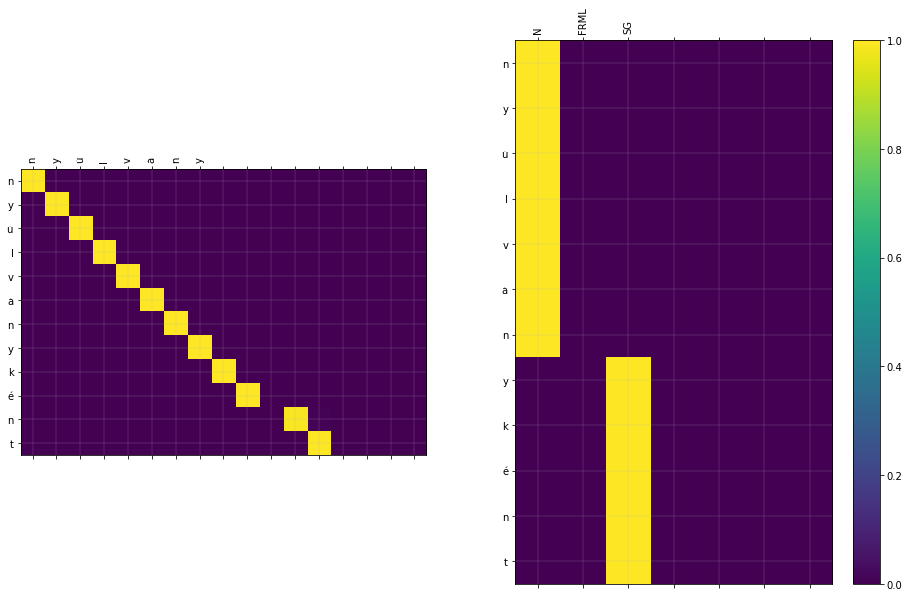

In [4]:
plot_random_word()

Input lemma: lándzsa
Input tags: N;FRML;PL
Expected output: lándzsákként
Model output: lándzsákként
Correct: True


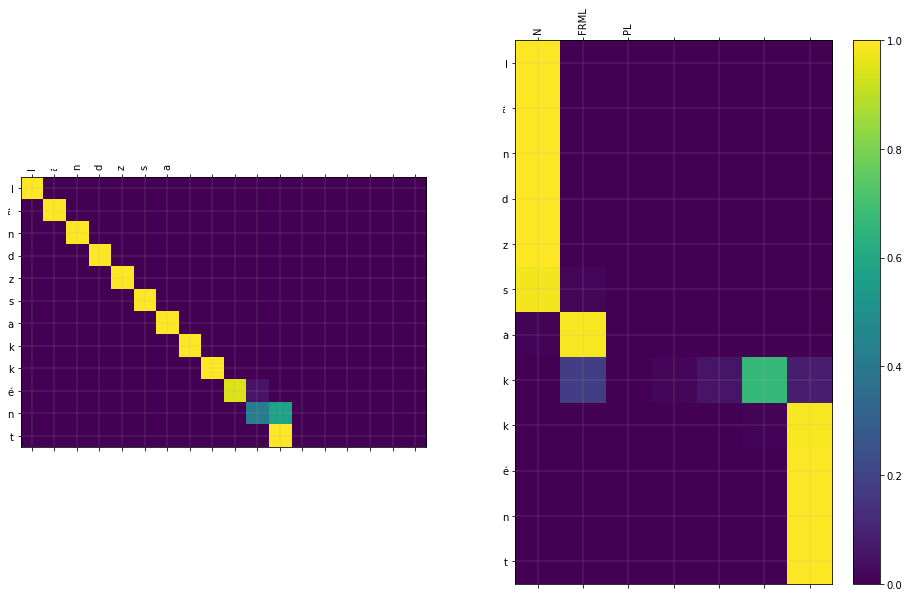

In [5]:
plot_random_word()

Input lemma: kényelmes
Input tags: N;DAT;PL
Expected output: kényelmeseknek
Model output: kényelmeseknek
Correct: True


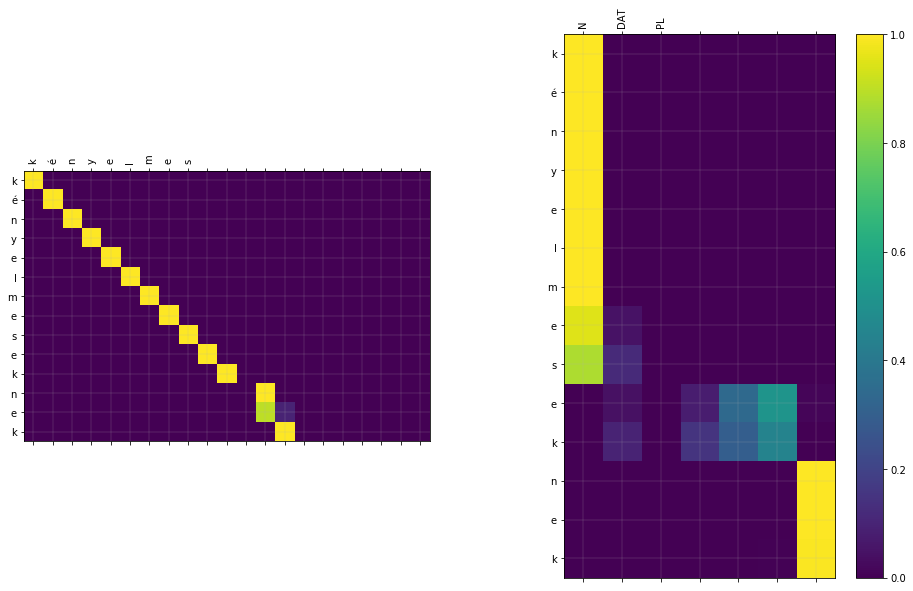

In [6]:
plot_random_word()

Input lemma: kijelent
Input tags: V;IND;PST;INDF;3;SG
Expected output: kijelentett
Model output: kijelentett
Correct: True


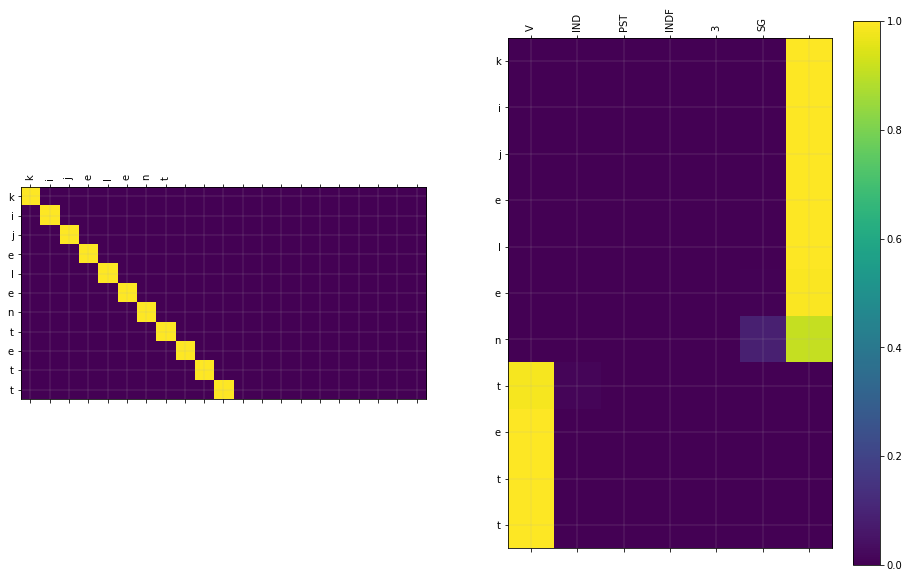

In [7]:
plot_random_word()

Input lemma: attraktív
Input tags: N;AT+ALL;PL
Expected output: attraktívakhoz
Model output: attraktívakhoz
Correct: True


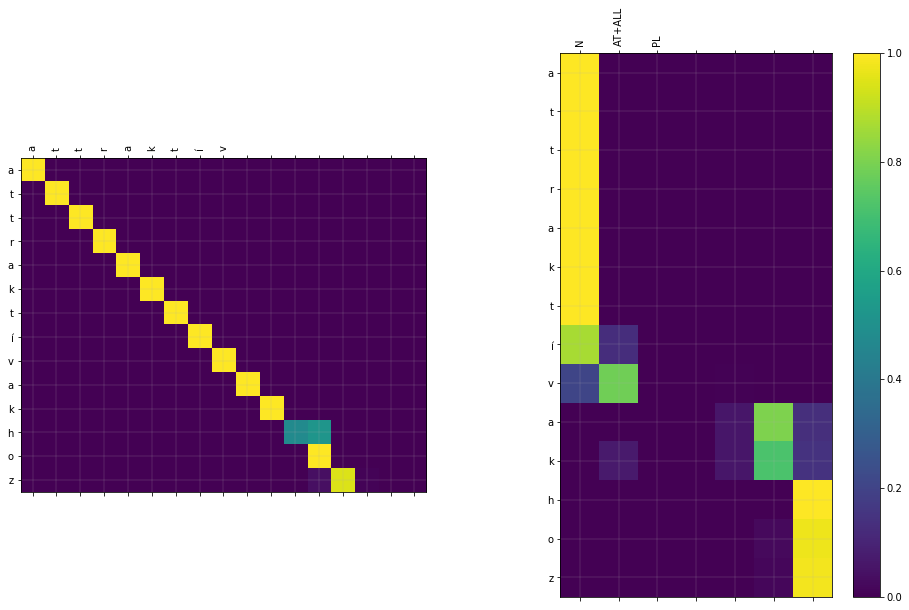

In [8]:
plot_random_word()

Input lemma: csúzli
Input tags: N;IN+ESS;PL
Expected output: csúzlikban
Model output: csúzlikban
Correct: True


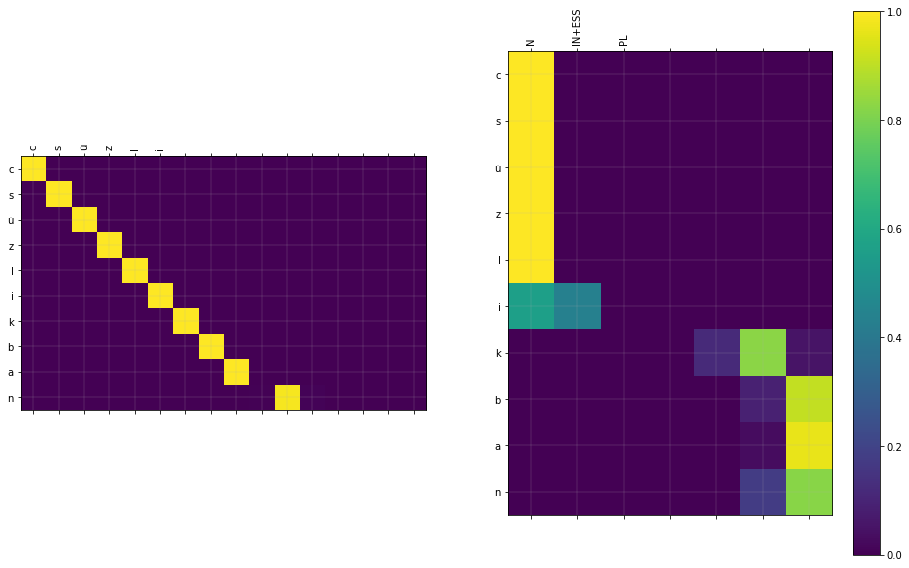

In [9]:
plot_random_word()

Input lemma: centenárium
Input tags: N;NOM;PL
Expected output: centenáriumok
Model output: centenáriumok
Correct: True


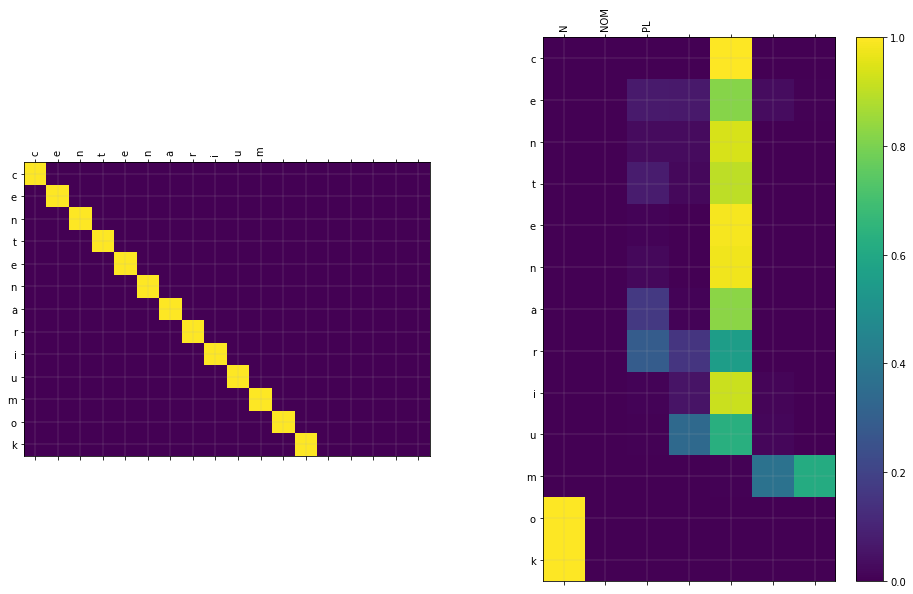

In [10]:
plot_random_word()
